<a href="https://colab.research.google.com/github/dafini05/COVID-19-DETECTION-USING-DL-ML-TECHNIQUES/blob/main/Covid_19_detection_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jahidhasanco/covid19-pneumonia-normal-chest-x-ray-pa-dataset

Dataset URL: https://www.kaggle.com/datasets/jahidhasanco/covid19-pneumonia-normal-chest-x-ray-pa-dataset
License(s): other
100% 1.34G/1.34G [01:11<00:00, 25.1MB/s]
100% 1.34G/1.34G [01:11<00:00, 20.0MB/s]


In [ ]:
!unzip /content/covid19-pneumonia-normal-chest-x-ray-pa-dataset.zip

Archive:  /content/covid19-pneumonia-normal-chest-x-ray-pa-dataset.zip
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078-768x572.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C-1068x1083.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/0C7E78DA-FAFC-480D-88B6-1459C51481AF-1068x817.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6-1068x1086.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/134895D3-77B8-4546-B7E5-C7DABD600309-1068x911.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D-768x635.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/1F6343EE-AFEC-4B7D-97F5-62797EE18767-1068x1064.jpeg  
  inflating: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid/23E99E2E-447C-46E5-8EB2-D35D1

In [ ]:
import os
len(os.listdir('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid'))

1525

In [ ]:
len(os.listdir('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/normal'))

1525

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
covid_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [ ]:
normal_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [ ]:
data = np.r_[covidImages, normalImages]

In [ ]:
targets = np.r_[covidTargets, normalTargets]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Flatten()),
model.add(Dense(512, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(512, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(512, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=9,validation_data=(x_test, y_test))

Epoch 1/9
72/72 [==============================] - 4s 21ms/step - loss: 2.7248 - accuracy: 0.7315 - val_loss: 0.6333 - val_accuracy: 0.7510
Epoch 2/9
72/72 [==============================] - 1s 14ms/step - loss: 0.8773 - accuracy: 0.8207 - val_loss: 0.4292 - val_accuracy: 0.8218
Epoch 3/9
72/72 [==============================] - 1s 13ms/step - loss: 0.4520 - accuracy: 0.8623 - val_loss: 0.3510 - val_accuracy: 0.8689
Epoch 4/9
72/72 [==============================] - 1s 11ms/step - loss: 0.3622 - accuracy: 0.8806 - val_loss: 0.2667 - val_accuracy: 0.8912
Epoch 5/9
72/72 [==============================] - 1s 11ms/step - loss: 0.2787 - accuracy: 0.8994 - val_loss: 0.3186 - val_accuracy: 0.9069
Epoch 6/9
72/72 [==============================] - 1s 12ms/step - loss: 0.2434 - accuracy: 0.9038 - val_loss: 0.3117 - val_accuracy: 0.9004
Epoch 7/9
72/72 [==============================] - 1s 11ms/step - loss: 0.2451 - accuracy: 0.9099 - val_loss: 0.3020 - val_accuracy: 0.9148
Epoch 8/9
72/72 [===

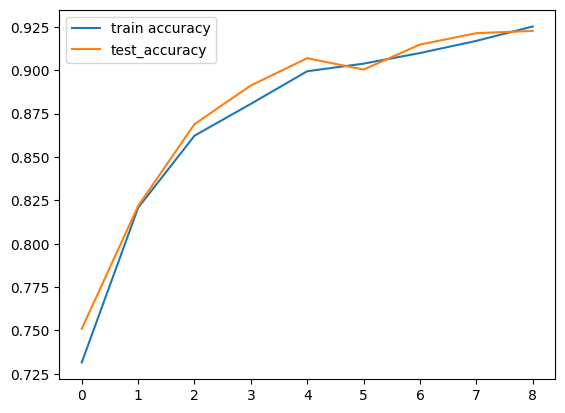

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

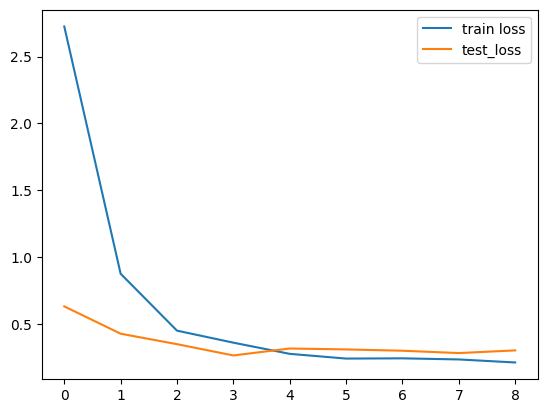

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()